In [1]:
import pickle, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score

In [2]:
with open('data/X_cluster.pkl', 'rb') as f:
    X_cluster = pickle.load(f)

In [3]:
inertias = []
n_clusters = [i for i in range(2, 100)]
for k in n_clusters:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_cluster)
    inertias.append(kmeanModel.inertia_)
    

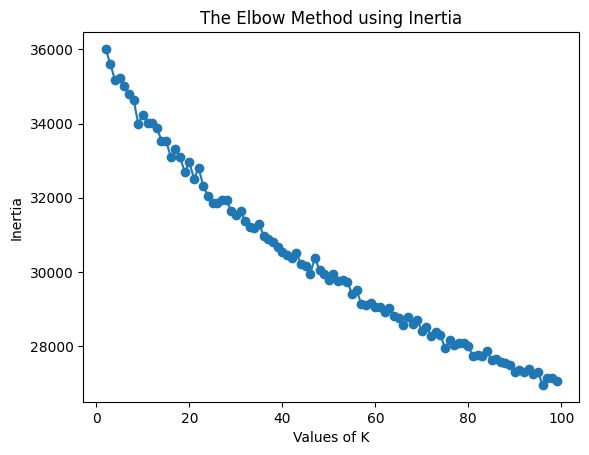

In [4]:
plt.plot(n_clusters, inertias, '-o')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [5]:
X_cluster.shape

(43797, 1000)

In [6]:
def silhouette(X, eps):
    silhouette_avg = []
    clusters = []
    for e in eps:
        # initialise kmeans
        dbscan = DBSCAN(eps=e, min_samples=500)
        dbscan.fit(X)
        cluster_labels = dbscan.labels_
        # silhouette score
        try:
            silhouette_avg.append(silhouette_score(X, cluster_labels))
        except ValueError:
            silhouette_avg.append(0)
            
        clusters.append(cluster_labels)

    plt.plot(eps, silhouette_avg, '-o')
    plt.xlabel('Values of EPS') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal EPS')
    plt.show()

    return clusters

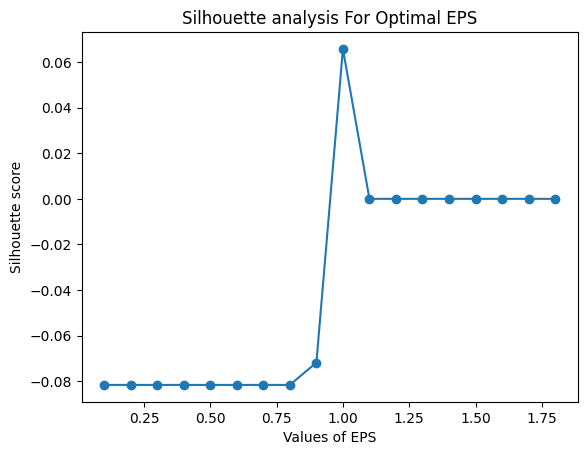

In [7]:
eps = [i / 10 for i in range(1, 19)]
clusters = silhouette(X_cluster, eps)

In [37]:
[np.unique(i) for i in clusters]

[array([-1,  0]),
 array([-1,  0]),
 array([-1,  0]),
 array([-1,  0]),
 array([-1,  0]),
 array([-1,  0]),
 array([-1,  0]),
 array([-1,  0]),
 array([-1,  0,  1,  2])]

In [39]:
{i: list(clusters[-1]).count(i) for i in np.unique(clusters[-1])}

{-1: 35628, 0: 7053, 1: 606, 2: 510}

<AxesSubplot: >

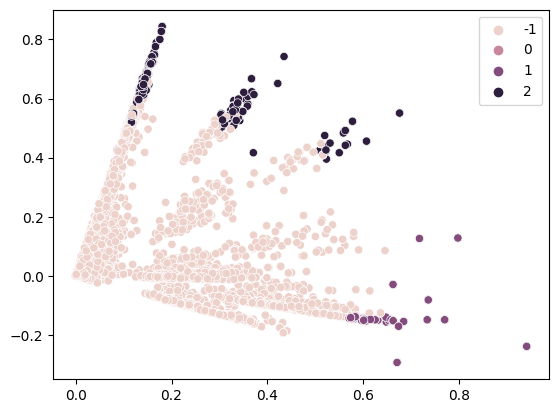

In [48]:
svd = TruncatedSVD()
X_cluster_svd = svd.fit_transform(X_cluster)
sns.scatterplot(x=[X_cluster_svd[i][0] for i in range(len(X_cluster_svd))], y=[X_cluster_svd[i][1] for i in range(len(X_cluster_svd))], hue=clusters[-1])